In [1]:
from model import FFNet, tv_model, ResBam
from learning import Learn, Selector, Metrics
from dataset import SKDS, TVDS, CDataset, ImageDatasetStats, AsTensor, Squeeze, DType

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [2]:
import numpy as np

class Dummy(CDataset):
    
    def load_data(self, boom='bust'):
        data = {1: (np.asarray([1,2,3,4]), np.asarray(100), ['apple','dog']),
                2: (np.asarray([5,6,7,8]), np.asarray(200), ['orange','cat'])}
        print(boom)
        return data
    
ds_params = {'train_params': {'embed': [('fruit',2,8,False,False),
                                        ('pet',2,8,False,False)],
                              'embed_lookup': {'fruit': {'apple': 1,
                                                         'orange': 2},
                                               'pet': {'dog': 1,
                                                       'cat': 2}},
             'boom': 'bang'}}
    
d = Dummy(**ds_params['train_params'])
d[1]           

bang
CDataset created...


(array([1, 2, 3, 4]), array(100), [tensor(1), tensor(1)])

In [3]:
ds_params={'embed': [],
           'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3
#stddev: 73.7

TVDS created...
images to process: 60000
images processed: 10000
images processed: 20000
images processed: 30000
images processed: 40000
images processed: 50000
images processed: 60000
mean: [33.33091590401786], stddev: [73.70246726596685]
mean:  [33.33091590401786]
stddev:  [73.70246726596685]


SKDS created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.090156
epoch: 0, lr: 0.01
train loss: 550720.1840277778, val loss: 516864.9125
sk_train_log: 0, sk_val_log: 0
learning time: 0:00:07.336468
epoch: 10, lr: 0.01
train loss: 12812.017686631945, val loss: 13863.9087890625
sk_train_log: 0, sk_val_log: 0
test loss: 7749.2107421875
learning time: 0:00:12.454639
test sklean metric: 
0 



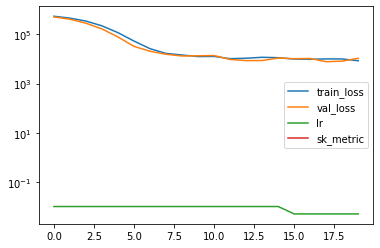

In [4]:
model_params = {'D_in': 256, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_regression',
                              'transform': None,
                              'target_transform': None,
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200}}}
             
metrics_params = {'report_interval': 10}                         
             
opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([SKDS], 
          FFNet,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

SKDS created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.978107
epoch: 0, lr: 0.01
train loss: 1.399409329061543, val loss: 1.3322263318916847
sk_train_log: 0.5431278457875536, sk_val_log: 0.6202873894589924
learning time: 0:00:14.430623
epoch: 4, lr: 0.01
train loss: 0.9097447351658301, val loss: 1.0170381418589889
sk_train_log: 0.8572492168442916, sk_val_log: 0.8213460980295159
learning time: 0:00:25.643557
epoch: 8, lr: 0.01
train loss: 0.7966739845363212, val loss: 1.0431365668773651
sk_train_log: 0.8913611439071014, sk_val_log: 0.8231051373514929
test loss: 1.0347768099143588
learning time: 0:00:28.838844
test sklean metric: 
0.8212021315029616 



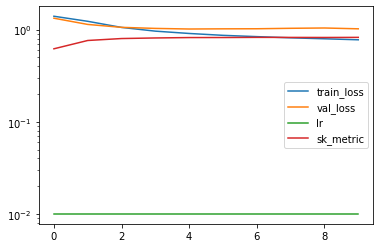

In [7]:
model_params = {'D_in': 256, 
                'H': 192, 
                'D_out': 4, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_classification',
                              'transform': transforms.Compose([AsTensor()]),
                              'target_transform': transforms.Compose([
                                                            DType('int64'),
                                                            AsTensor(),
                                                            Squeeze()]),
                              'sk_params': {'n_samples': 100000,
                                            'n_features': 256,
                                            'n_informative': 50,
                                            'n_clusters_per_class': 10,
                                            'flip_y': 0.05,
                                            'class_sep': 0.01,
                                            'n_classes': 4}}}
                                     
metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss,
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

Files already downloaded and verified
TVDS created...
Files already downloaded and verified
TVDS created...
TorchVision model resnet18 loaded...
learning time: 0:00:12.269966
epoch: 0, lr: 0.01
train loss: 2.3381025009155274, val loss: 2.0488959320129885
sk_train_log: 0.6266578786789536, sk_val_log: 0.7170048491563008
learning time: 0:00:24.243564
epoch: 1, lr: 0.01
train loss: 2.037598150253296, val loss: 2.057608729408633
sk_train_log: 0.7162876512424634, sk_val_log: 0.7552073371505436
learning time: 0:00:36.185268
epoch: 2, lr: 0.01
train loss: 1.932012005329132, val loss: 1.8970675160807948
sk_train_log: 0.7576037715509717, sk_val_log: 0.7831086180759701
learning time: 0:00:48.180800
epoch: 3, lr: 0.01
train loss: 1.842943474292755, val loss: 1.7845368000768846
sk_train_log: 0.7826504523125897, sk_val_log: 0.8121506653231098
learning time: 0:01:00.329334
epoch: 4, lr: 0.01
train loss: 1.764731770992279, val loss: 1.7193845145163997
sk_train_log: 0.8042540919507883, sk_val_log: 0.82

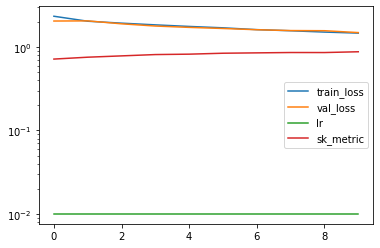

In [8]:
model_params = {'model_name': 'resnet18',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None,
                                          'download': True}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None,
                                         'download': True}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

TVDS created...
TVDS created...
CModel loaded...
ResBam model loaded...
learning time: 0:00:25.637674
epoch: 0, lr: 0.005
train loss: 1.9605410709381104, val loss: 1.8716563793920702
sk_train_log: 0.75022896043255, sk_val_log: 0.778902253969626
learning time: 0:00:51.154369
epoch: 1, lr: 0.005
train loss: 1.8187533655166626, val loss: 1.7898823368933894
sk_train_log: 0.794113412071689, sk_val_log: 0.8035709315512142
learning time: 0:01:17.322402
epoch: 2, lr: 0.005
train loss: 1.7390798730850219, val loss: 1.749443208017657
sk_train_log: 0.8151304768282255, sk_val_log: 0.8120403720564358
learning time: 0:01:42.365840
epoch: 3, lr: 0.005
train loss: 1.7082027921676635, val loss: 1.7214445721718572
sk_train_log: 0.8223201951649701, sk_val_log: 0.8190560357003649
learning time: 0:02:07.555226
epoch: 4, lr: 0.005
train loss: 1.6213988571166993, val loss: 1.596876928883214
sk_train_log: 0.8437772056200424, sk_val_log: 0.844740440080821
learning time: 0:02:32.656201
epoch: 5, lr: 0.005
train

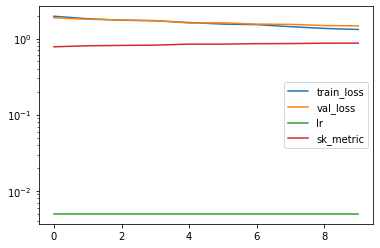

In [10]:
model_params = {'n_classes': 10,
                'residual': True,
                'in_channels': 3,
                'groups': 1,
                'bam': True,
                'dropout': [False,False,False,False,False],
               # 'act': None
               }


ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.005}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          ResBam, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=10)

TVDS created...
TVDS created...
TorchVision model resnext50_32x4d loaded...
learning time: 0:00:58.368548
epoch: 0, lr: 0.01
train loss: 2.855412069320679, val loss: 2.1120757326003043
sk_train_log: 0.5557828108674624, sk_val_log: 0.6833572783784728
learning time: 0:01:54.896342
epoch: 1, lr: 0.01
train loss: 2.079865969657898, val loss: 2.0799868683661185
sk_train_log: 0.6951765701618263, sk_val_log: 0.7204742819395318
learning time: 0:02:51.631519
epoch: 2, lr: 0.01
train loss: 2.0201768169403076, val loss: 2.0271202133547876
sk_train_log: 0.722271083207325, sk_val_log: 0.7406731963906197
learning time: 0:03:48.395592
epoch: 3, lr: 0.01
train loss: 1.9420597553253174, val loss: 1.9244261826238325
sk_train_log: 0.7558345421671929, sk_val_log: 0.7830780360695415
learning time: 0:04:45.337127
epoch: 4, lr: 0.01
train loss: 1.8594789838790893, val loss: 1.802608274644421
sk_train_log: 0.7797898323498179, sk_val_log: 0.8158540792835799
learning time: 0:05:42.231048
epoch: 5, lr: 0.01
trai

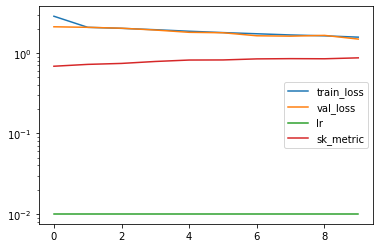

In [2]:
model_params = {'model_name': 'resnext50_32x4d',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=10)